In [2]:
run Lattice_functions.ipynb

In [24]:
#Generating the lattice
nx = 6 + 1 # 1 added to make the total length = 100*0.01
ny = 6 + 1
lx = 0.5
ly = 0.5
k_inPlane = 10
nz = 3
lz = 0.01
k_vertical = 10
M1 = Rect_Lattice(nx, ny, lx, ly, k_inPlane, [], [], [])
M1 = add_layers_in_z_direction(M1, nz, lz, k_vertical, 0, [])

#setting z of the middle layer to zero:
min_x = M1.nodes[1].x
min_y = M1.nodes[1].y
max_x = M1.nodes[1].x
max_y = M1.nodes[1].y

for i in M1.nodes:
    i.z = round(i.z, 12) - lz
    i.x = round(i.x, 12)
    i.y = round(i.y, 12)
    min_x = min(i.x, min_x)
    min_y = min(i.y, min_y)
    max_x = max(i.x, max_x)
    max_y = max(i.y, max_y)

#Adding support
for i in M1.nodes:
    if(i.z == 0):
        if(i.x == min_x or i.x == max_x or i.y == min_y or i.y == max_y):
            i.s_x = 1
            i.s_y = 1
            i.s_z = 1
            M1.support_x.append(i.n)
            M1.support_y.append(i.n)
            M1.support_z.append(i.n)

In [25]:
#Optimization preparation:
x0 = []
y0 = []
z0 = []
for i in M1.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

#bounds:
lb = -np.inf*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in M1.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in M1.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in M1.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

In [26]:
f = Point_load_at_centre(1, M1)

In [27]:
res = minimize(Energy, coord0, args = (f, M1), method='trust-constr', jac = Jacobian, options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 153, function evaluations: 153, CG iterations: 917, optimality: 3.06e-09, constraint violation: 0.00e+00, execution time:  8.5 s.


In [ ]:
len(M1.nodes)

In [28]:
result = res.x
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

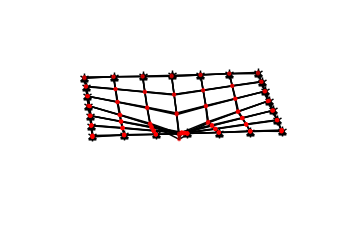

In [29]:
ax = Lattice_Plot(x, y, z, M1, [], 'DSZ', 30, 85, 0.5, '10x10x2_fullbraced_uniform_3D')

In [ ]:
ax = plt.gca(projection="3d")
ax.scatter(x,y,z, c='r',s=10)

In [ ]:
res = minimize(Energy, coord0, args = (f, M1), method='trust-constr', jac = Jacobian_FD, options={'verbose': 1}, bounds=bounds)

In [ ]:
result = res.x
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

In [ ]:
ax = Lattice_Plot(x, y, z, M1, [], 'XsY', 30, 85, 0.5, '10x10x2_fullbraced_uniform_3D')

In [13]:
res = minimize(Energy, coord0, args = (f, M1), method='SLSQP', jac = Jacobian, options={'disp': True}, bounds=bounds)

Iteration limit exceeded    (Exit mode 9)
            Current function value: -0.4101385372588489
            Iterations: 101
            Function evaluations: 207
            Gradient evaluations: 101


In [14]:
result = res.x
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

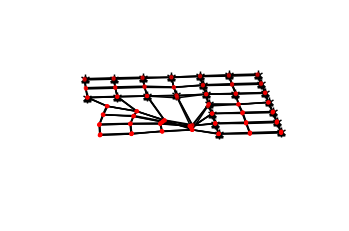

In [15]:
ax = Lattice_Plot(x, y, z, M1, [], 'XsY', 30, 85, 0.5, '10x10x2_fullbraced_uniform_3D')

In [19]:
coord_rand = np.random.rand(len(coord0))
f_rand = np.random.rand(len(f))

In [22]:
J = Jacobian(coord_rand, f_rand, M1)
J_fd = Jacobian_FD(coord_rand, f_rand, M1)

In [23]:
for i in range(0, max(len(J), len(J_fd))):
    if(abs(J[i] - J_fd[i]) > 0.01):
        print('for i = ' + str(i) + ' : J = ' + str(J[i]) + ' and J_fd = ' + str(J_fd[i]))